<a href="https://colab.research.google.com/github/Nabanita29/Research/blob/main/Image_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a id="top_section"></a>

<div align='center'><font size="6" color="#000000"><b> Image Recognition using CNN </b></font></div>
<hr>
<div align='center'><font size="5" color="#000000">Introduction</font></div>
<hr>

<br><br>
In this notebook we will build a Digit Recognizer using Convolutional Neural Network(CNN) and will try to explain each step.

### Project Made by



1.   Nabanita Chatterjee 21csu057
2.   Himanshi 21csu038
3.   Hemant Naidu 21csu037








![Image Recognier](https://miro.medium.com/max/372/1*AO2rIhzRYzFVQlFLx9DM9A.png)

<a id="section1"></a>
## Importing the libraries and Data


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style()

# to divide our data into train and validation set
from sklearn.model_selection import train_test_split
#to encode our labels
from tensorflow.keras.utils import to_categorical
#to build our model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
# Our optimizer options
from keras.optimizers import RMSprop
from keras.optimizers import Adam
#Callback options
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
#importing image data generator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#for the final prediction report
from sklearn.metrics import classification_report ,confusion_matrix

In [3]:
train =pd.read_csv('../input/digit-recognizer/train.csv')
test=pd.read_csv('../input/digit-recognizer/test.csv')
y_train=train['label']
print(f'The size of training data is {train.shape[0]} and that of test data is {test.shape[0]}')

The size of training data is 42000 and that of test data is 28000


In [4]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [5]:
x_train=train.drop('label',axis=1).values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Let's just see a random image from our dataset
- We will use the imshow(image show) function of matplotlib library here.
- we will reshape it to a image size that is 28 * 28 so that we can plot it from 728.

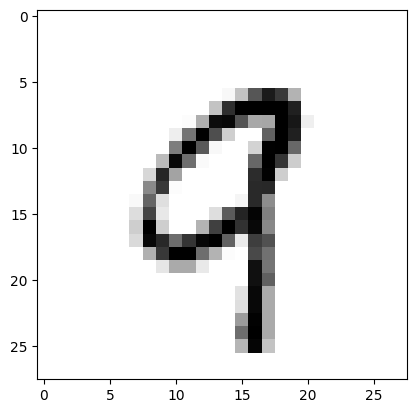

In [6]:
plt.imshow(x_train[41999].reshape(28,28),cmap='binary')
plt.show()

<a id="section3"></a>
## Shaping our data


Now we will reshape the whole x_train dataset.

In [7]:
x_train=x_train.reshape(42000,28,28)

In [8]:
x_train.shape

(42000, 28, 28)

Let's split our data into training and validation set , we will use the train_test_split function of sklearn library for this step.

![Data splitting chart](https://i.stack.imgur.com/pXAfX.png)

In [9]:

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.10,random_state=19)

In [10]:
print(f'The training set has {x_train.shape[0]} images and the validation set has {x_val.shape[0]} images')

The training set has 37800 images and the validation set has 4200 images


<a id="section4"></a>
## Encoding the Label column


As our label column has 10 possible values(0-9) we will encode it using the to_categorical function from the keras.
- We will use num_classes as 10 , as that is how many possible values the column can have.

In [11]:
y_cat_train=to_categorical(y_train,num_classes=10)
y_cat_val=to_categorical(y_val,num_classes=10)

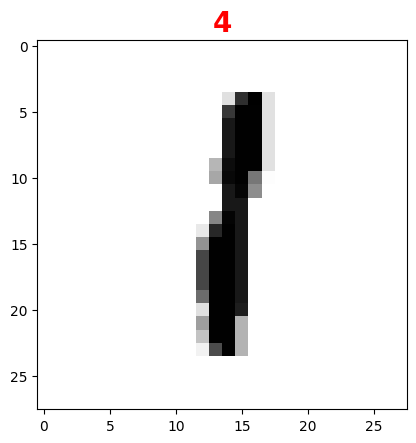

In [12]:
random_image=x_train[78]
random_label=y_train[78]
plt.imshow(random_image,cmap='binary')
plt.title(random_label,fontsize=20,weight='bold',color='red')
plt.show()

<a id="section3"></a>
## Scaling our data


Let's see what is the range of our data for the images. Simply the (max-min) value is range.

In [13]:
random_image.max()

255

In [14]:
random_image.min()

0

Clearly 255 is the range , so we will now use this value to scale our data !

In [15]:
x_train_scaled=x_train/255
x_val_scaled=x_val/255

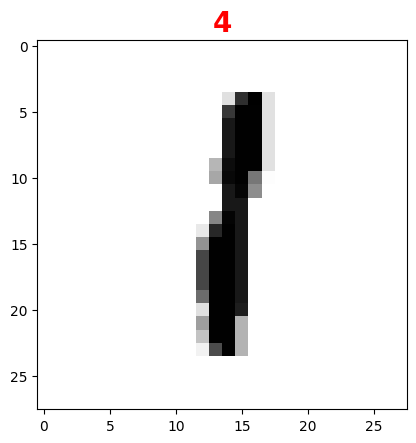

In [16]:
plt.imshow(x_train_scaled[78],cmap='binary')
plt.title(y_train[78],fontsize=20,weight='bold',color='red')
plt.show()

In [17]:
x_train_final = x_train_scaled.reshape(x_train_scaled.shape[0],28,28,1)
x_val_final = x_val_scaled.reshape(x_val_scaled.shape[0],28,28,1)

<a id="section6"></a>
## Building our CNN Model


<a id="section7"></a>
## Choosing an optimizer


Let's use RMSprop optimizer by :
- Setting learning rate to 0.001
- The value of rho to 0.9
- Epsilon to 10^-8
- Decay to zero


In [18]:
from keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)


<a id="section8"></a>
## Building our model


> Start with a base model , and change a little bit and continue doing so , stop when you get better results.

In [19]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),input_shape=(28,28,1),padding='Same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),input_shape=(28,28,1),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),input_shape=(28,28,1),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),input_shape=(28,28,1),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

<a id="section9"></a>
## Choosing a callback


There are two call-back techniques that we tried :
- [Earlystop]: A basic technique which stops training when a monitored metric has stopped improving.
- [ReduceLRonPlateau] : A more advance technique than early stop which reduces learning rate when a metric has stopped improving.

In [20]:

early_stop= EarlyStopping(monitor='val_loss',patience=2)

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

<a id="section10"></a>
## Data Augmentation

- Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.


We used ImageDataGenerator function from keras here for data augmentation ,and have set the range for different features as below:
- Rotation : 10
- Width : 10%
- Height : 10%
- Sheer : 10 %
- Zoom : 10%

In [22]:
image_gen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,fill_mode='nearest')

Now let's call the image_gen we created !

In [23]:
train_image_gen=image_gen.fit(x_train_final)

In [24]:
train_image_gen

<a id="section11"></a>
## Training our Model !

Now we will be training the model.


In [25]:
epoch= 15

In [26]:
model.fit_generator(image_gen.flow(x_train_final,y_cat_train),epochs=epoch,validation_data=(x_val_final,y_cat_val),callbacks=[learning_rate_reduction])

<ipython-input-26-a9ccd47e7242>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(image_gen.flow(x_train_final,y_cat_train),epochs=epoch,validation_data=(x_val_final,y_cat_val),callbacks=[learning_rate_reduction])


Epoch 1/15
1182/1182 [==============================] - 268s 222ms/step - loss: 0.3330 - accuracy: 0.8938 - val_loss: 0.0596 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 2/15
1182/1182 [==============================] - 258s 219ms/step - loss: 0.1219 - accuracy: 0.9639 - val_loss: 0.0366 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 3/15
1182/1182 [==============================] - 252s 214ms/step - loss: 0.0936 - accuracy: 0.9729 - val_loss: 0.0320 - val_accuracy: 0.9895 - lr: 0.0010
Epoch 4/15
1182/1182 [==============================] - 254s 215ms/step - loss: 0.0817 - accuracy: 0.9767 - val_loss: 0.0309 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 5/15
1182/1182 [==============================] - 263s 222ms/step - loss: 0.0698 - accuracy: 0.9791 - val_loss: 0.0270 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 6/15
1182/1182 [==============================] - 251s 212ms/step - loss: 0.0653 - accuracy: 0.9803 - val_loss: 0.0267 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 7/15
1182/1182 [============

<a id="section12"></a>
## Accuracy and Loss plots

In [27]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy,lr
0,0.333026,0.893757,0.059580,0.982619,0.0010
1,0.121861,0.963915,0.036572,0.988810,0.0010
2,0.093649,0.972910,0.031960,0.989524,0.0010
3,0.081656,0.976667,0.030866,0.988810,0.0010
4,0.069819,0.979074,0.027000,0.990476,0.0010
5,0.065308,0.980344,0.026665,0.994286,0.0010
6,0.061005,0.982090,0.025310,0.993095,0.0010
7,0.058380,0.983333,0.029092,0.990952,0.0010
8,0.058742,0.982566,0.022325,0.994762,0.0010
9,0.049722,0.985265,0.038092,0.990476,0.0010


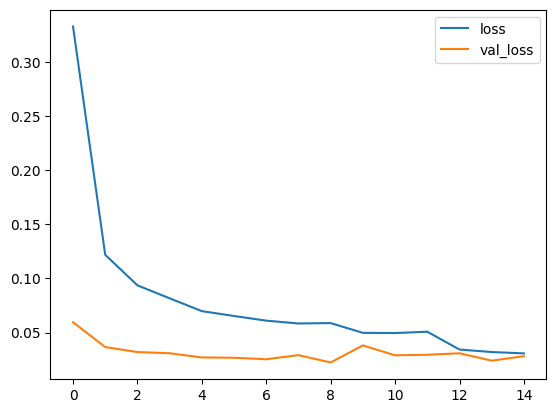

In [28]:
metrics[['loss' , 'val_loss']].plot()
plt.show()

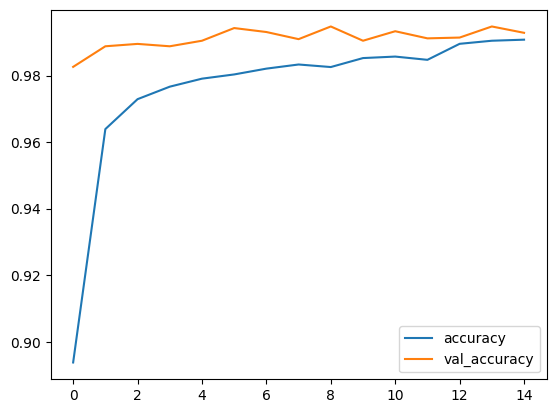

In [29]:
metrics[['accuracy' , 'val_accuracy']].plot()
plt.show()

<a id="section13"></a>
## Accuracy Report

In [30]:
model.evaluate(x_val_final, y_cat_val, verbose=0)

[0.028111878782510757, 0.9928571581840515]

In [32]:
import numpy as np

# Assuming x_val_final is your input for which you want to predict the classes
y_pred_probs = model.predict(x_val_final)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)


132/132 [==============================] - 8s 59ms/step


In [33]:

print('Classification Report')
print(classification_report(y_val,y_pred))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_val,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       417
           1       1.00      1.00      1.00       476
           2       1.00      0.99      1.00       384
           3       1.00      0.99      1.00       451
           4       0.99      0.99      0.99       391
           5       0.98      1.00      0.99       424
           6       0.99      0.99      0.99       403
           7       0.99      0.99      0.99       470
           8       1.00      0.98      0.99       383
           9       0.98      0.99      0.99       401

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



Confusion Matrix
[[414   0   0   0   0   1   2   0   0   0]
 [  0 474   0   0   0   0   0   2   0   0]
 [  0   0 381   0   0   0   0   2   1   0]
 [  0   0   0 447   0   1   0   1   0   2]
 [  0   1   0   0 389   0   

1/1 [==============================] - 0s 36ms/step
Prediction:
4


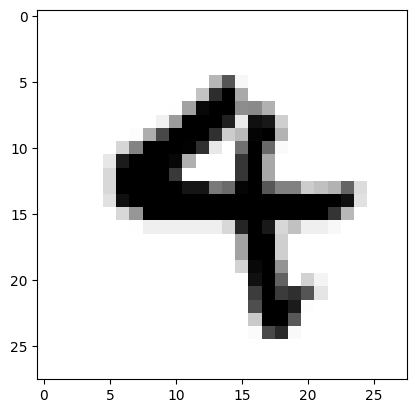

In [35]:
np.random.seed(22)
random_selection = np.random.randint(0, 4201, size=1)
random_sample = x_val_final[random_selection]

# Correctly using predict and handling the output to get the class prediction
predicted_probabilities = model.predict(random_sample.reshape(1, 28, 28, 1))
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

print('Prediction:')
print(predicted_class)

# Plotting the image
plt.imshow(random_sample.reshape(28, 28), cmap='binary')
plt.show()


1/1 [==============================] - 0s 122ms/step
Prediction:
9


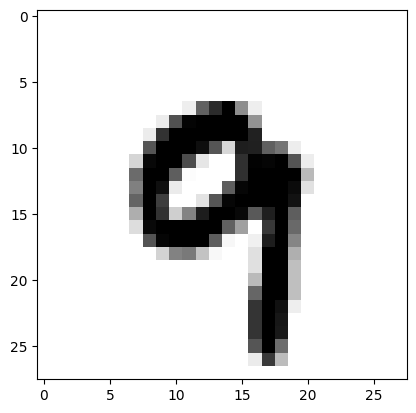

In [37]:
np.random.seed(20)
random_selection = np.random.randint(0, 4201, size=1)
random_sample = x_val_final[random_selection]

# Use the model's predict method and then apply np.argmax to find the predicted class
predicted_probabilities = model.predict(random_sample.reshape(1, 28, 28, 1))
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

print('Prediction:')
print(predicted_class)

# Plotting the image
plt.imshow(random_sample.reshape(28, 28), cmap='binary')
plt.show()  # Make sure to call the function with ()


1/1 [==============================] - 0s 40ms/step
Prediction:
1


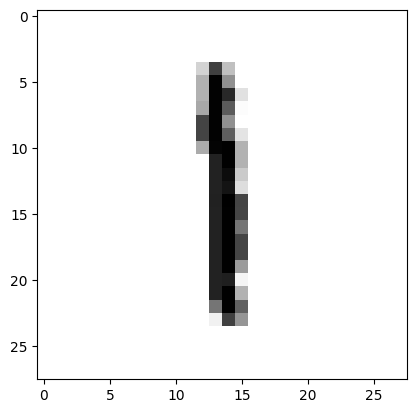

In [38]:
np.random.seed(19)
random_selection = np.random.randint(0, 4201, size=1)
random_sample = x_val_final[random_selection]

# Using model.predict and handling the output properly
predicted_probabilities = model.predict(random_sample.reshape(1, 28, 28, 1))
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

print('Prediction:')
print(predicted_class)

# Plotting the image
plt.imshow(random_sample.reshape(28, 28), cmap='binary')
plt.show()  # Ensuring plt.show() is called to actually display the plot


In [39]:
# Reshaping test data
x_test = test.values
x_test = x_test.reshape(28000,28,28)
x_test.shape

(28000, 28, 28)

In [40]:
x_test_scaled=x_test/255

In [42]:
import numpy as np

# Assuming x_test_scaled is already properly scaled and ready for prediction
test_predictions_probs = model.predict(x_test_scaled.reshape(28000, 28, 28, 1))

# Converting probability distributions to predicted class indices
test_predictions = np.argmax(test_predictions_probs, axis=1)


875/875 [==============================] - 47s 53ms/step


In [43]:
test_predictions

array([2, 0, 9, ..., 3, 9, 2])

Let's convert these predictions into a submiitable csv file.

In [44]:
output=pd.DataFrame({'ImageId':test.index+1,'Label':test_predictions})
output.to_csv('new_submission.csv',index=False)